In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import run, PIPE

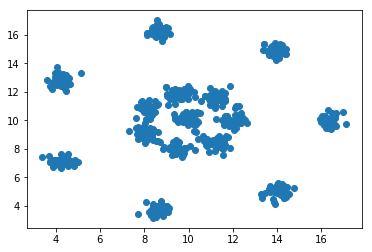

In [7]:
datasetPath = '../datasets/R15.txt'
executablePath = '../../clustering'
mstMode = 'Prim'
inconsistencyModeRange = ['StandardDeviation', 'Factor']
neighborhoodDepthRange = ['2', '3', '4']
inconsistencyParameterRange = [str(x/2) for x in range(1, 7)]
X = []
Y = []
with open(datasetPath) as fin:
    pointsNumber = int(fin.readline())
    for i in range(pointsNumber):
        line = fin.readline()
        positions = line.split()
        X.append(float(positions[0]))
        Y.append(float(positions[1]))
plt.scatter(X, Y)
plt.show()
#print(X[:10])
#print(Y[:10])

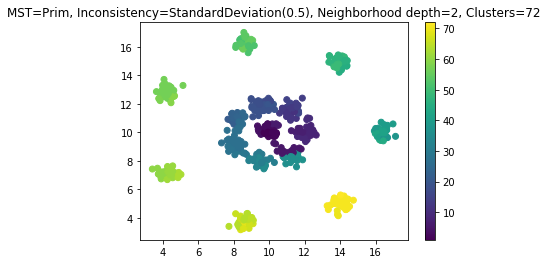

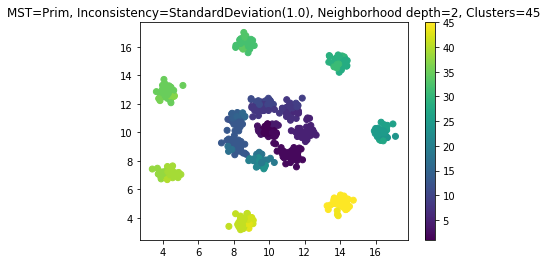

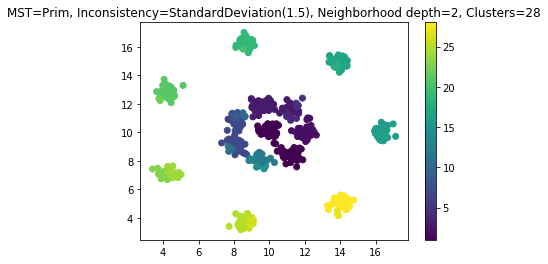

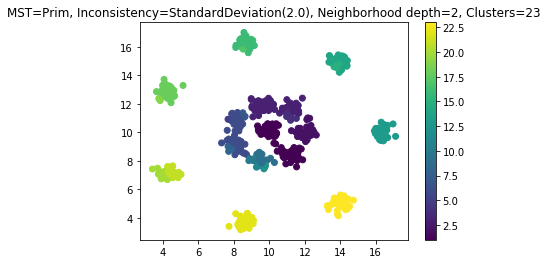

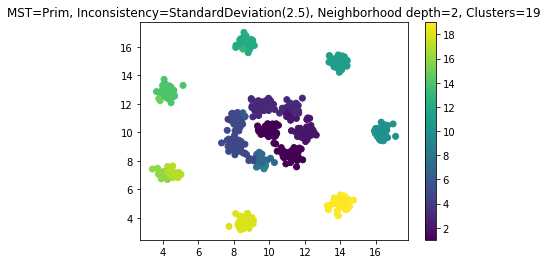

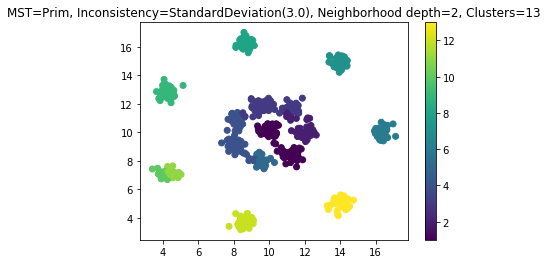

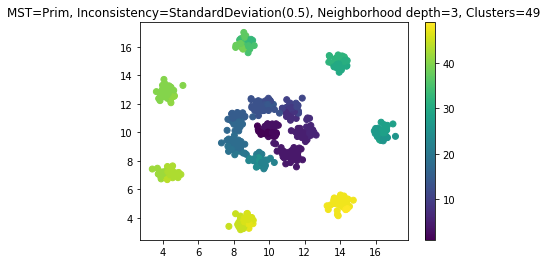

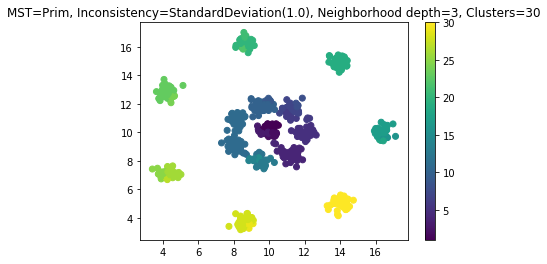

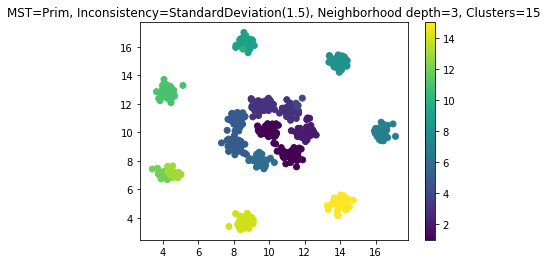

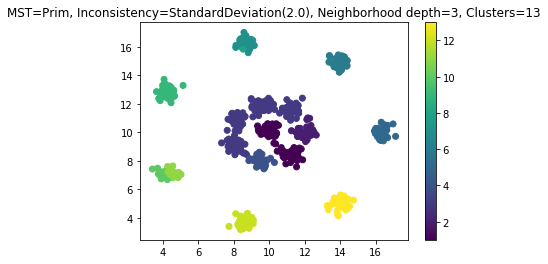

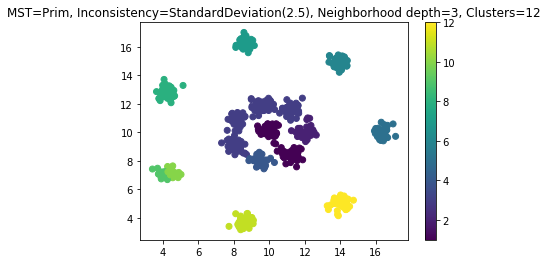

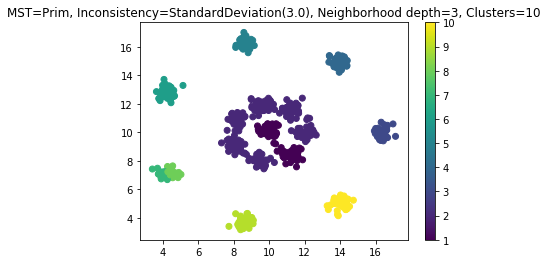

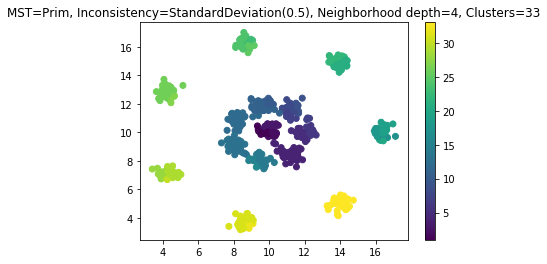

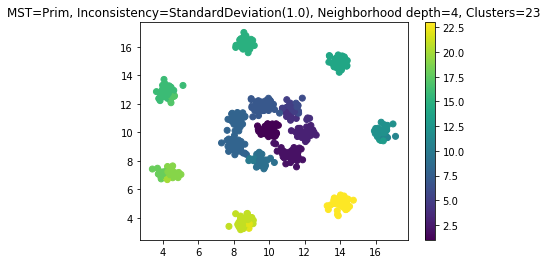

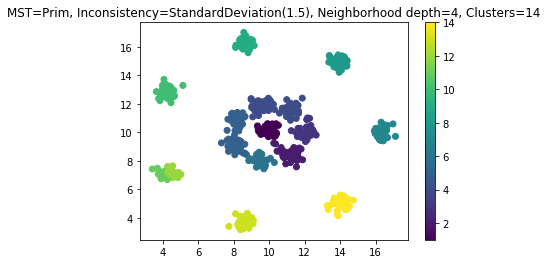

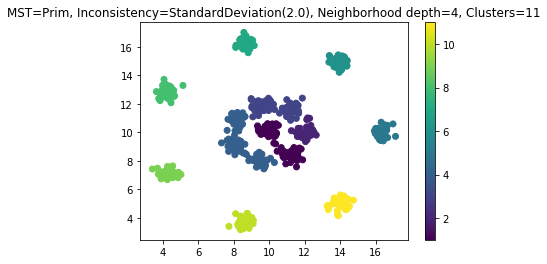

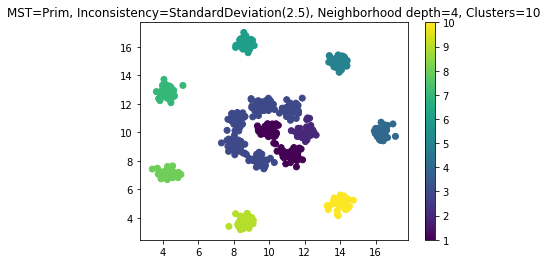

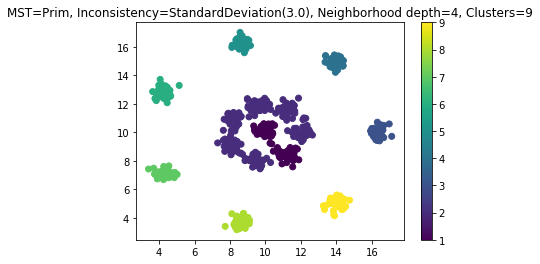

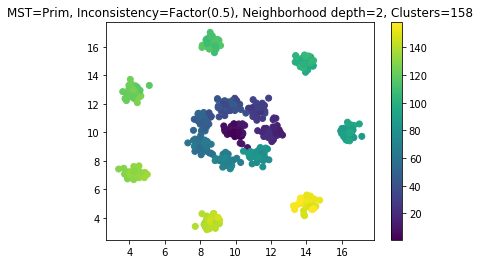

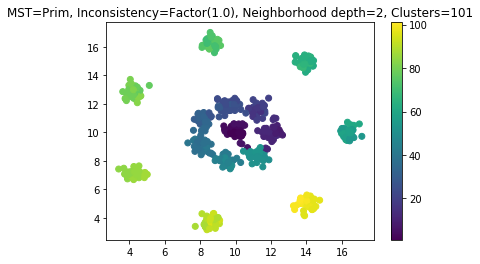

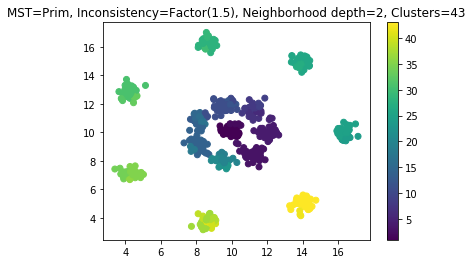

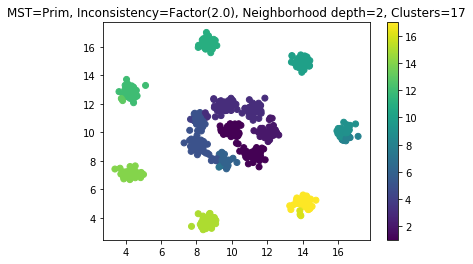

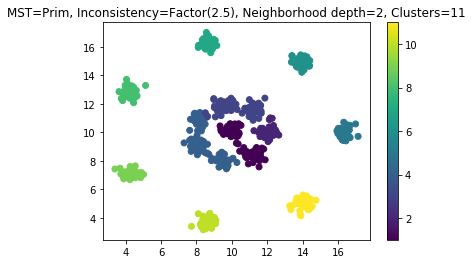

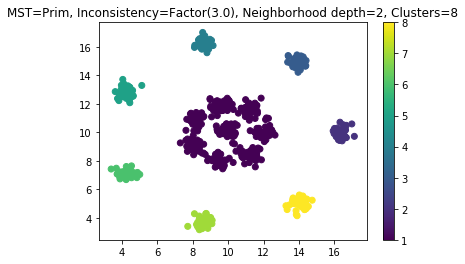

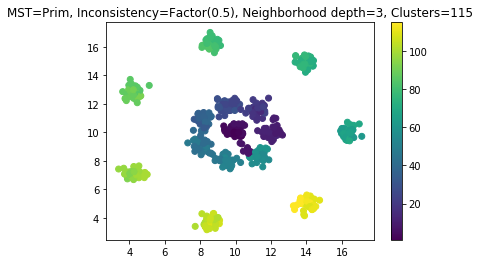

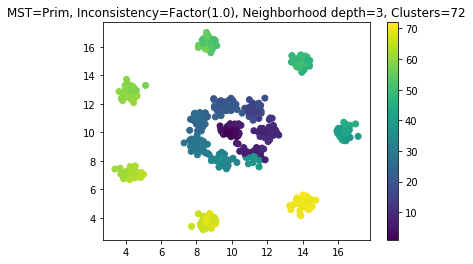

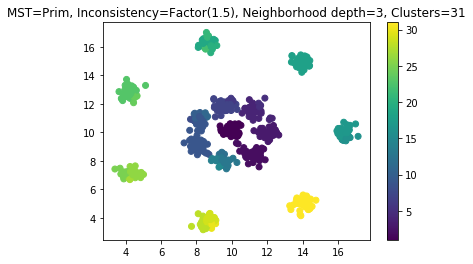

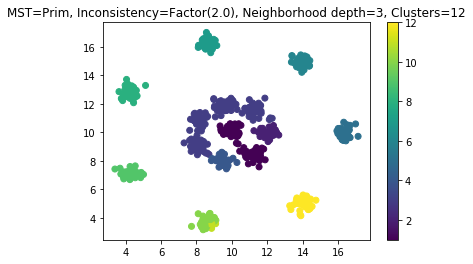

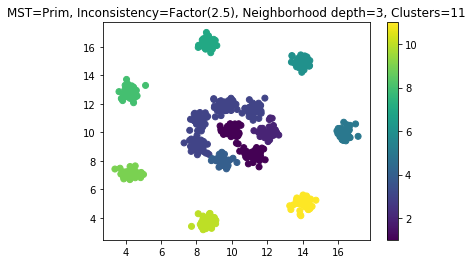

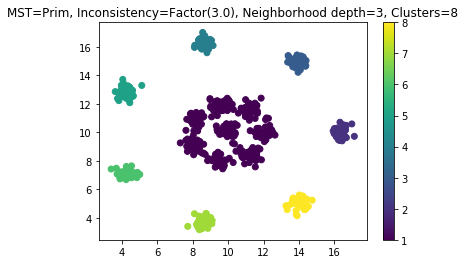

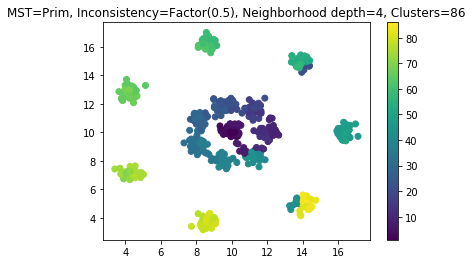

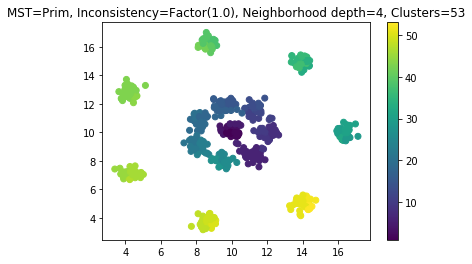

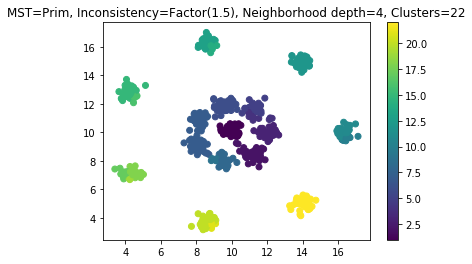

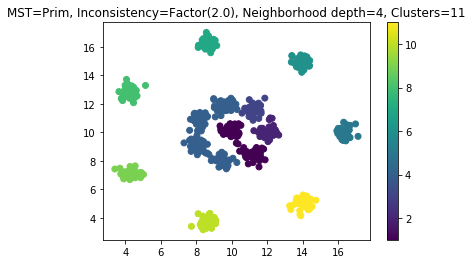

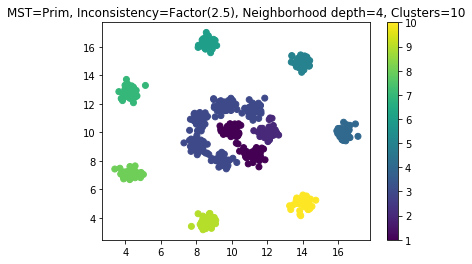

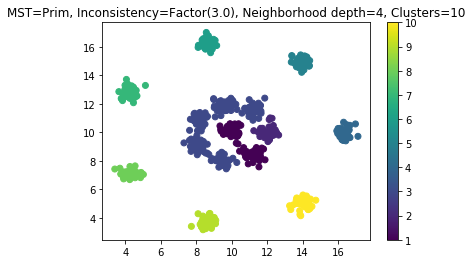

In [8]:
for inconsistencyMode in inconsistencyModeRange:
    for neighborhoodDepth in neighborhoodDepthRange:
        for inconsistencyParameter in inconsistencyParameterRange:
            with open(datasetPath) as fin:
                output = run([executablePath, mstMode, inconsistencyMode, neighborhoodDepth, inconsistencyParameter], check=True, text=True, stdin=fin, stdout=PIPE).stdout
            C = [int(x) for x in output.split()]
            clusters = len(set(C))
            scatter = plt.scatter(X, Y, c=C)
            plt.title('MST={0}, Inconsistency={1}({3}), Neighborhood depth={2}, Clusters={4}'.format(mstMode, inconsistencyMode, neighborhoodDepth, inconsistencyParameter, clusters))
            plt.colorbar(scatter)
            plt.show()
#print(C[:10])